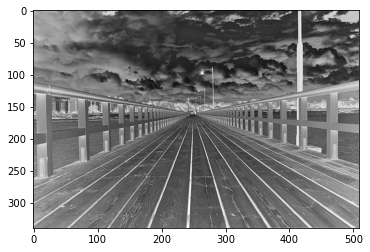

In [71]:
from skimage.transform import (hough_line, hough_line_peaks)
import numpy as np
import cv2
from matplotlib import pyplot as plt

#image = cv2.imread('pexels-photo-10622719.jpeg', 0) #Fails if uses as-is due to bright background.
#image = cv2.imread('1603176284-vanishingpoint.jpg', 0)
#image = cv2.imread('maxresdefault.jpg', 0)
image = cv2.imread('vanishing-point-4468780__340.jpg', 0)
#image = cv2.imread('intersecting-lines.jpg', 0)



image = ~image  #Invert the image (only if it had bright background that can confuse hough)
plt.imshow(image, cmap='gray')


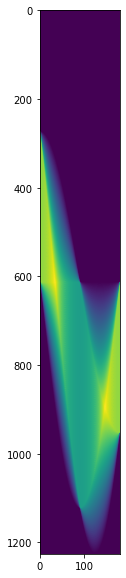

In [72]:
# Set a precision of 1 degree. (Divide into 180 data points)
# You can increase the number of points if needed. 
tested_angles = np.linspace(-np.pi / 2, np.pi / 2, 180)

# Perform Hough Transformation to change x, y, to h, theta, dist space.
hspace, theta, dist = hough_line(image, tested_angles)

plt.figure(figsize=(10,10))
plt.imshow(hspace)  





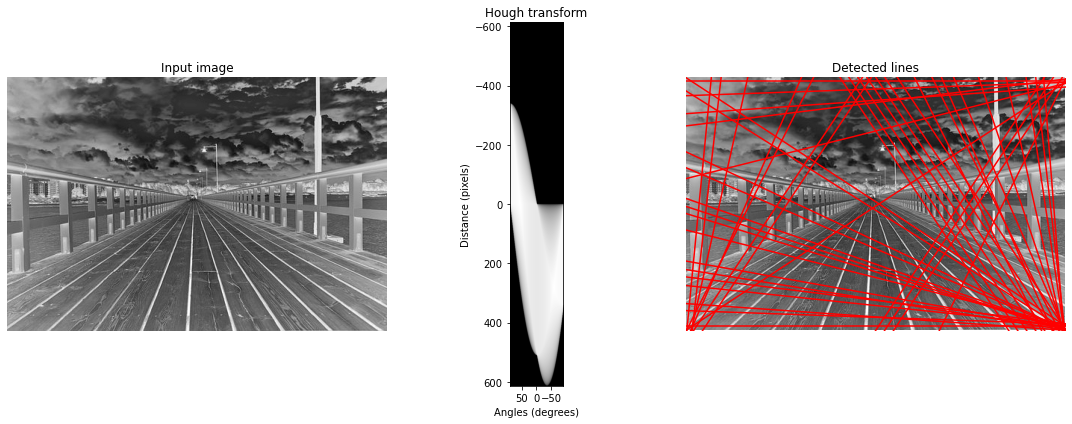

In [73]:
#Now, to find the location of peaks in the hough space we can use hough_line_peaks
h, q, d = hough_line_peaks(hspace, theta, dist)

#Example code from skimage documentation to plot the detected lines
angle_list=[]  #Create an empty list to capture all angles

# Generating figure 1
fig, axes = plt.subplots(1, 3, figsize=(15, 6))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Input image')
ax[0].set_axis_off()

ax[1].imshow(np.log(1 + hspace),
             extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), dist[-1], dist[0]],
             cmap='gray', aspect=1/1.5)
ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')

ax[2].imshow(image, cmap='gray')

origin = np.array((0, image.shape[1]))


for _, angle, dist in zip(*hough_line_peaks(hspace, theta, dist)):
    angle_list.append(angle) #Not for plotting but later calculation of angles
    y0, y1 = (dist - origin * np.cos(angle)) / np.sin(angle)
    ax[2].plot(origin, (y0, y1), '-r')
ax[2].set_xlim(origin)
ax[2].set_ylim((image.shape[0], 0))
ax[2].set_axis_off()
ax[2].set_title('Detected lines')

plt.tight_layout()
plt.show()

In [74]:
###############################################################
# Convert angles from radians to degrees (1 rad = 180/pi degrees)
angles = [a*180/np.pi for a in angle_list]

# Compute difference between the two lines
angle_difference = np.max(angles) - np.min(angles)
print(180 - angle_difference)   #Subtracting from 180 to show it as the small angle between two lines


0.0
